Take Home Assignment 02: Liquid Level

1. Analyzing the liquid level of a vessel will be studied in this assignment
2. How to utilize background subtraction is demonstrated in the notebook
3. How to use subsequent thresholding and contour analysis is also demonstrated
4. The student's task is to implement the demonstrated techniques to obtain a liquid level plot for the entirety of the video

Notes:
It is advised to go over the opencv documentation for the following functions

cv2.threshold  :  https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html




Student has to deliver:
1. Plot of the liquid level.
2. A brief note on what the student understood by reading the section on Otsu's threholding method.
3. 2 examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.
4. A brief description on the final algorithm developed by the student.


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

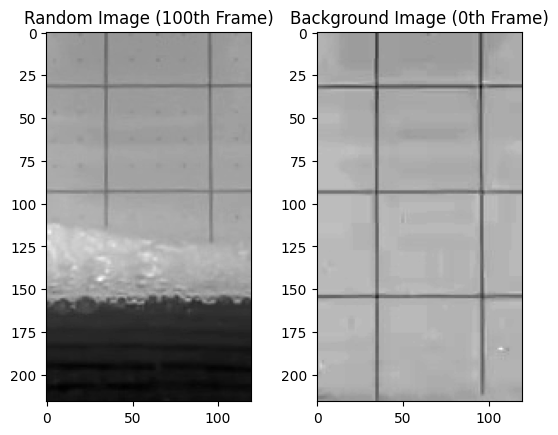

In [ ]:
# Importing Demo Images
img_r = cv2.imread('demo2_images/liquid_frame100.jpg', 0)
img_b = cv2.imread('demo2_images/liquid_frame000.jpg', 0)

# Display the images
plt.subplot(121), plt.imshow(img_r, cmap='gray'), plt.title('Random Image (100th Frame)')
plt.subplot(122), plt.imshow(img_b, cmap='gray'), plt.title('Background Image (0th Frame)')
plt.show()

Method 1 : Background Subtraction

Threshold Value: 50.0
Contour 0 Area: 6826.0
Contour 1 Area: 0.0
Contour 2 Area: 0.0
Largest Contour Size: 6826.0
Total Area: 25920
Percentage: 26.3 %


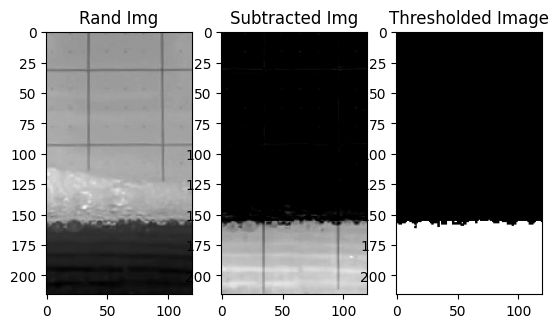

In [ ]:
# Subtracting the images
img_sub = cv2.subtract(img_b, img_r)

# Thresholding the image, to obtain binary image
ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Print the used threshold value
print('Threshold Value:', ret)

# Find contours in the image
contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by size in descending order
contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
# Print the contour areas
for i in range(len(contours)):
    print('Contour', i, 'Area:', cv2.contourArea(contours[i]))

# Find the area of the whole image
rows, cols = img_sub_thresh.shape
total_area = rows * cols
print('Total Area:', total_area)

# Calculate the percentage of the largest contour area, rounded to 1 decimal point
percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
print('Percentage:', percentage, '%')

# Display img_r , img_sub, img_sub_thresh side by side using plt
plt.subplot(131), plt.imshow(img_r, cmap='gray'), plt.title('Rand Img')
plt.subplot(132), plt.imshow(img_sub, cmap='gray'), plt.title('Subtracted Img')
plt.subplot(133), plt.imshow(img_sub_thresh, cmap='gray'), plt.title('Thresholded Image')
plt.show()

How to read video files

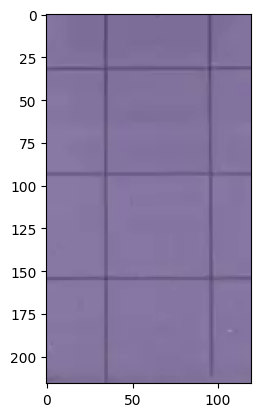

True

In [ ]:
# Reading frames from a video
cap = cv2.VideoCapture('demo2_images/liquidVideo.mp4')
ret, frame1 = cap.read()

# Displaying the first frame using plt
plt.imshow(frame1)
plt.show()



# **Answers**

Question 01: Plot of the liquid level.

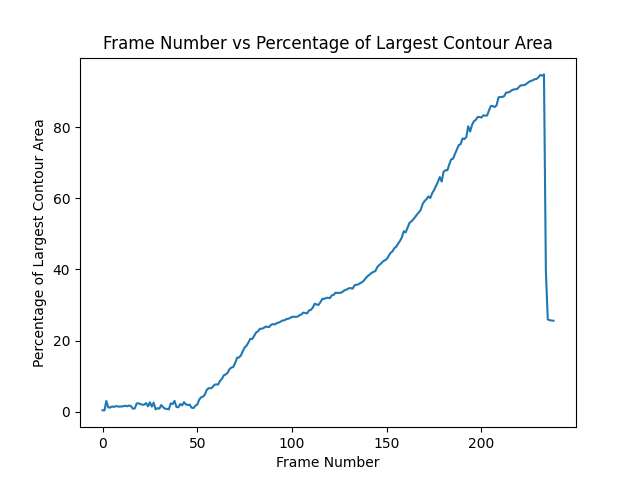

Question 02 : A brief note on what the student understood by reading the section on Otsu's threholding method.

Answer : Otsu's thresholding is an automatic method for converting a grayscale image into a binary image by determining the optimal threshold value. It works by minimizing the variance within the foreground and background while maximizing the variance between them, making it particularly effective for images with distinct intensity levels. In the code, Otsu's method is applied after converting the frame to grayscale, allowing the system to adaptively separate the moving liquid from the background without manual input. This step ensures accurate contour detection and analysis, crucial for the overall processing.

Question 03 : 2 examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.

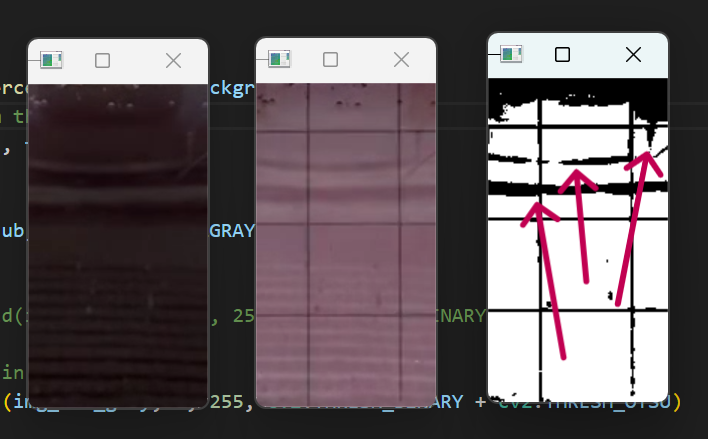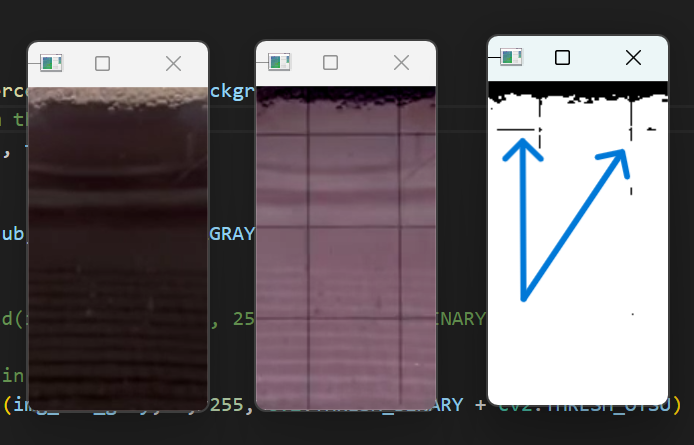

Question 04: A brief description on the final algorithm developed by the student.

Answer : The process begins with background subtraction, where each frame is compared to a reference background, highlighting any differences caused by the liquid's movement. The resulting image is then converted to grayscale and processed using Otsu's thresholding, which automatically determines the optimal threshold to create a binary image. This binary image simplifies the detection of the liquid by separating it from the background.

Once the binary image is obtained, contour detection is applied to identify the boundaries of the liquid, and the area of the largest contour is calculated. This area is expressed as a percentage of the total frame size, providing a measure of how much of the frame is occupied by the liquid. The percentage for each frame is recorded and used to generate a plot of the liquid level over time. This plot visually represents how the liquid's visible area changes as the video progresses, serving as a dynamic measure of the liquid level throughout the video. These techniques—background subtraction, thresholding, and contour detection—are key to accurately identifying and tracking the liquid level.



# Code Used

In [ ]:
import cv2
import matplotlib.pyplot as plt

def process_video(video_path):
    def calculate_largest_contour_area_percentage(frame, background):
        # Subtract the current frame from the background
        img_sub = cv2.subtract(background, frame)

        # Convert to grayscale
        img_sub_gray = cv2.cvtColor(img_sub, cv2.COLOR_BGR2GRAY)

        # Apply threshold
        #_, img_sub_thresh = cv2.threshold(img_sub_gray, 75, 255, cv2.THRESH_BINARY)

        # Thresholding the image, to obtain binary image
        _, img_sub_thresh = cv2.threshold(img_sub_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Find contours
        contours, _ = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # Calculate the largest contour area percentage
        if contours:
            largest_contour_area = max(cv2.contourArea(c) for c in contours)
            frame_area = frame.shape[0] * frame.shape[1]
            return (largest_contour_area / frame_area) * 100, img_sub, img_sub_thresh
        else:
            return 0, img_sub, img_sub_thresh

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Unable to open video file {video_path}")
        return

    ret, background = cap.read()
    if not ret:
        print("Error: Unable to read the first frame.")
        cap.release()
        return

    percentages = []
    frame_no = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        percentage, img_sub, img_sub_thresh = calculate_largest_contour_area_percentage(frame, background)
        percentages.append(percentage)

        # Display the video and processed frames
        cv2.imshow('Original Frame', frame)
        cv2.imshow('Subtracted Frame', img_sub)
        cv2.imshow('Thresholded Frame', img_sub_thresh)

        # Break the loop on pressing 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        frame_no += 1

    cap.release()
    cv2.destroyAllWindows()

    # Plot frame number vs percentage
    plt.plot(range(len(percentages)), percentages)
    plt.xlabel('Frame Number')
    plt.ylabel('Percentage of Largest Contour Area')
    plt.title('Frame Number vs Percentage of Largest Contour Area')
    plt.show()

# Call the function with the video path
video_path = ' c:/Users/HM/Downloads/ETM4272-main/ETM4272-main/demo2_images/liquidVideo.mp4'
process_video(video_path)
